# Contenuti
- [Pre-processing](#Pre-processing)
- [Campionamento](#Campionamento)
    - [Dataset 1](#Dataset-1)
    - [Esercizio 1](#Esercizio-1)
- [Bilanciamento](#Bilanciamento)
    - [Dataset 2](#Dataset-2)
    - [Undersampling](#Undersampling)
    - [Oversampling](#Oversamapling)
    - [Esercizio 2](#Esercizio-2)
- [Riduzione della dimensionalità](#Riduzione-della-dimensionalità)
    - [Dataset 3](#Dataset-1)
    - [Combinazione di attributi](#Combinazione-di-attributi)
    - [Feature selection](#Feature-selection)
    - [Esercizio 3](#Esercizio-3)
- [Trasformazione degli attributi](#Trasformazione-degli-attributi)
    - [Esercizio 4](#Esercizio-4)

# Pre-processing

Nell'esercitazione odierna si vedrà come applicare alcune delle tecniche di pre-processing viste durante le lezioni teoriche. In particolare ci focalizzeremo sul campionamento, il bilanciamento dei dati, la risoluzione della dimensionalità tramite combinazione e selezione di attributi e infine la trasformazione degli attributi, con lo scopo di evitare che un attributo, con un range di valori alti, possa dominare su attributi con range di valori più piccoli. 

Per questa prima parte dell'esercitazione useremo Iris Plant dataset, che contiene 3 classi di 50 istanze ciascuna, dove ogni classe si riferisce a un tipo di pianta di iris. 

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Campionamento

Durante le precedenti esercitazioni abbiamo campionato i dataset in modo da partizionarli con un *simple random sampling* con la procedura **train_test_split** per creare le partizioni di training e test, necessarie per addestrare il classificatore attraverso il training set e simulare le prestazioni dei modelli su dati nuovi/non visti con il test set. Per ulteriori dettagli sulla procedura train_test_split si rimanda all'esercitazione 3.

## Stratificazione

Le partizioni create con **train_test_split** sono randomiche e non tengono in considerazione la composizione delle classi. Impostando il parametro *stratify* di questa stessa funzione è possibile eseguire un camionamento stratificato dei dati, come mostrato nel codice seguente.

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

#split senza stratificazione
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.3)
unique, counts = np.unique(train_y, return_counts=True)
print("Frequenze delle classi senza stratificazione :", counts)

#split con stratificazione
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y)
unique, counts = np.unique(train_y, return_counts=True)
print("Frequenze delle classi con stratificazione :", counts)


Frequenze delle classi senza stratificazione : [34 32 39]
Frequenze delle classi con stratificazione : [35 35 35]


La libreria Scikit-learn mette a disposizione anche una classe appartenente sempre allo stesso sottomodulo che permette di eseguire un campionamento stratificato [**StratifiedShuffleSplit(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) per suddividere un dataset in più parti (non solo due).

In fase di instanziamento è possibile impostare il parametro *n_splits*, che definisce il numero di campioni da estrarre dal dataset, mentre *test_size* (come per la procedura **train_test_split**) descrive la percentuale di record che dovrà essere contenuta nella partizione di test, ma a differenza di **train_test_split** permette di specificare anche la la percentuale di record che dovrà essere contenuta nella partizione di training. Da notare che la somma di questi due valori non deve essere uguale ad 1.

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

#creare l'oggetto per lo split stratificato
sss = StratifiedShuffleSplit(3, test_size=0.3, train_size = 0.5, random_state=0)
#esegue lo split sul dataset etichettato e restituisce gli indici
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    unique, counts = np.unique(y_train, return_counts=True)
    print("Frequenze delle classi con stratificazione nel train:", counts)
    unique, counts = np.unique(y_test, return_counts=True)
    print("Frequenze delle classi con stratificazione nel test:", counts)

Frequenze delle classi con stratificazione nel train: [25 25 25]
Frequenze delle classi con stratificazione nel test: [15 15 15]
Frequenze delle classi con stratificazione nel train: [25 25 25]
Frequenze delle classi con stratificazione nel test: [15 15 15]
Frequenze delle classi con stratificazione nel train: [25 25 25]
Frequenze delle classi con stratificazione nel test: [15 15 15]


# Dataset 1
Per il primo esercizio useremo il dataset per il task di classificazione di documenti testuali 'The 20 newsgroups text dataset' che contiene 20 classi e 11314 record che rappresenta un documento. Ogni record è rappresentato da 130107 attributi numerici che definiscono la frequenza delle parole all'interno del testo. Per caricare il dataset è necessario importare il modulo della libreria che lo contiene per poi richiamarla all'interno del codice. 

In [45]:
from sklearn.datasets import fetch_20newsgroups_vectorized

#per importare il dataset in formato (data_matrix, label) è necessario specificare return_X_y=True
# X, y = fetch_20newsgroups_vectorized(return_X_y=True)

# print(np.shape(X))
# print(np.shape(y))

## Esercizio 1

Confrontare i due dataset precedenti, verificare come cambiano le prestazioni di un classificatore k-NN e di un albero decisionale con un campionamento del dataset (con e senza stratificazione) rimuovendo  iterativamente il 10% dei campioni dal dataset originale.

In [46]:
#Scrivi qui la soluzione
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target

def print_class_accuracy(train_x,train_y,test_x,test_y,clf):
    unique, counts = np.unique(train_y, return_counts=True)
    print("Frequenze delle classi nel train:", counts)
    clf.fit(train_x,train_y)
    print(accuracy_score(clf.predict(test_x),test_y))
    print()
    

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.3)
kn = KNeighborsClassifier(1,algorithm="brute")
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
ab = DecisionTreeClassifier(max_depth=2,random_state=0)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y)
kn = KNeighborsClassifier(1,algorithm="brute")
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
ab = DecisionTreeClassifier(max_depth=2,random_state=0)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)


# kn = KNeighborsClassifier(1,algorithm="brute")
# kn.fit(X,y)



Frequenze delle classi nel train: [34 32 39]
0.9777777777777777

Frequenze delle classi nel train: [34 32 39]
0.9111111111111111

Frequenze delle classi nel train: [35 35 35]
0.9777777777777777

Frequenze delle classi nel train: [35 35 35]
0.9555555555555556



In [47]:
X, y = fetch_20newsgroups_vectorized(return_X_y=True)

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)
unique, counts = np.unique(train_y, return_counts=True)
print("Frequenze delle classi nel train:", counts)
unique, counts = np.unique(test_y, return_counts=True)
print("Frequenze delle classi con tratificazione nel test:", counts)
kn = KNeighborsClassifier(1,algorithm="brute")
kn.fit(train_x,train_y)
print(accuracy_score(kn.predict(test_x),test_y))
ab = DecisionTreeClassifier(max_depth=50,random_state=0)
ab.fit(train_x,train_y)
print(accuracy_score(ab.predict(test_x),test_y))

# sss = StratifiedShuffleSplit(3, test_size=0.3, train_size = 0.5, random_state=0)
#esegue lo split sul dataset etichettato e restituisce gli indici
# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)
unique, counts = np.unique(train_y, return_counts=True)
print("Frequenze delle classi nel train:", counts)
unique, counts = np.unique(test_y, return_counts=True)
print("Frequenze delle classi con stratificazione nel test:", counts)
kn = KNeighborsClassifier(1,algorithm="brute")
kn.fit(train_x,train_y)
print(accuracy_score(kn.predict(test_x),test_y))
ab = DecisionTreeClassifier(max_depth=50,random_state=0)
ab.fit(train_x,train_y)
print(accuracy_score(ab.predict(test_x),test_y))



Frequenze delle classi nel train: [377 476 475 482 442 481 483 475 463 482 476 462 461 476 467 497 437 459
 382 298]
Frequenze delle classi con tratificazione nel test: [103 108 116 108 136 112 102 119 135 115 124 133 130 118 126 102 109 105
  83  79]
0.6858152894387981
0.5695978789217853
Frequenze delle classi nel train: [384 467 473 472 463 474 468 475 478 478 480 476 473 475 474 479 437 451
 372 302]
Frequenze delle classi con stratificazione nel test: [ 96 117 118 118 115 119 117 119 120 119 120 119 118 119 119 120 109 113
  93  75]
0.6681396376491383
0.556783031374282


# Bilanciamento
Per la seconda parte di questa esercitazione lavoreremo sul bilanciamento e per farlo useremo la libreria **imbalanced-learn** per Python che mette a disposizione numerose classi e funzionalità specifiche per il bilanciamento dei dati. Per una lista completa delle funzionalità si rimanda alla [documentazione ufficiale](https://imbalanced-learn.org/stable/references/index.html).

Dato che tale libreria non è installata nel vostro environment conda è necessario instalarla con il comando *conda install -c conda-forge imbalanced-learn*.

# Dataset 2

Per questa parte dell'esercitazione useremo un daset generato con una funzione messa a disposizione dalla libreria **Scikit-learn** mette a disposizione anche delle funzioni per la generazione di dataset sintetici che potete trovare nella [documentazione](https://scikit-learn.org/stable/datasets/sample_generators.html). Tra queste c'è la funzione [**make_classification(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) per generare dataset casuali per la classificazione, variando i parametri *n_samples* (numero totale di punti generati), *n_features* (numero di attributi), *random_state* (seme iniziale per la generazione casuale) è possibile ottenere dataset differenti e soprattutto, impostando il parametro *weight* è possibile variare la distribuzione dei record per le differenti classi. In questo caso, con il codice seguente creeremo un dataset fortemente sbilanciato.

Dataset originale [(0, 1019), (1, 523), (2, 8458)]


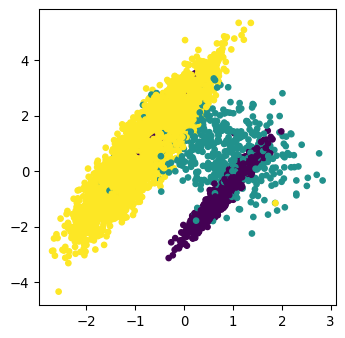

In [48]:
from collections import Counter
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.1, 0.05, 0.85],
                           class_sep=0.8, random_state=0)

print('Dataset originale %s' % sorted(Counter(y).items()))

plt.figure(num=0, dpi=96, figsize=(4, 4))
plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=16)
plt.show()


# Undersampling
Durante le lezioni teoriche abbiamo visto che il metodo più semplice per bilanciare un dataset di grandi dimensioni è quello di sotto-campionare la classe/classi maggioritarie usando le dimensioni della classe minoritaria. 

**imbalanced-learn** mette a disposizione numerose classi per eseguire l'undersampling, tra queste ci sono i metodi visti durante le lezioni teoriche, ossia metodi:
 - randomici, che eliminano i record in maniera random [RandomUnderSampler(...)](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).
 - probabilistici che preservano quelli con più alta probabilità [InstanceHardnessThreshold(...)](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.InstanceHardnessThreshold.html).
 - basati su distanze che preservano i più vicini ai più vicini [NearMiss(version=1)](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html).
 - basati su distanze che preservano i più vicini ai più lontani [NearMiss(version=2)](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html).
 - metodi generativi basati su clustering [ClusterCentroids(...)](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html).

Possono essere utilizzati come mostrato nel codice seguente

In [49]:
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold, NearMiss, ClusterCentroids

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print('Dataset dopo il random undersampling %s' % sorted(Counter(y_resampled).items()))  

iht = InstanceHardnessThreshold()
X_resampled, y_resampled = iht.fit_resample(X, y)
print('Dataset dopo il probabilistico undersampling %s' % sorted(Counter(y_resampled).items()))  

nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X, y)
print('Dataset dopo il NearMiss_v1 undersampling %s' % sorted(Counter(y_resampled).items()))

nm = NearMiss(version=2)
X_resampled, y_resampled = nm.fit_resample(X, y)
print('Dataset dopo il NearMiss_v3 undersampling %s' % sorted(Counter(y_resampled).items()))

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)
print('Dataset dopo il kMeans undersampling %s' % sorted(Counter(y_resampled).items()))

Dataset dopo il random undersampling [(0, 523), (1, 523), (2, 523)]
Dataset dopo il probabilistico undersampling [(0, 587), (1, 523), (2, 6192)]
Dataset dopo il NearMiss_v1 undersampling [(0, 523), (1, 523), (2, 523)]
Dataset dopo il NearMiss_v3 undersampling [(0, 523), (1, 523), (2, 523)]
Dataset dopo il kMeans undersampling [(0, 523), (1, 523), (2, 523)]


# Oversampling
Durante le lezioni teoriche abbiamo visto che una alternativa all'undersampling, quando il dataset non è di grandi dimensioni è quello di sovre-campionare la classe/classi minoritarie usando le dimensioni della classe maggioritaria. 

**imbalanced-learn** mette a disposizione due classi principali per eseguire l'oversampling, con i metodi visti durante le lezioni teoriche:
 - random oversampling, [RandomOverSampler(...)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)
 - Synthetic Minority Over-sampling Technique (SMOTE) algorithm [SMOTE(...)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
 - Oversample using Adaptive Synthetic (ADASYN) algorithm [ADASYN(...)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html).

Possono essere utilizzati come mostrato nel codice seguente

In [50]:
print('Dataset originale %s' % sorted(Counter(y).items()))

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN 

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print('Dataset dopo random oversampling %s' % sorted(Counter(y_resampled).items()))

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
print('Dataset dopo SMOTE oversampling %s' % sorted(Counter(y_resampled).items()))

ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X, y)
print('Dataset dopo ADASYN oversampling %s' % sorted(Counter(y_resampled).items()))


Dataset originale [(0, 1019), (1, 523), (2, 8458)]
Dataset dopo random oversampling [(0, 8458), (1, 8458), (2, 8458)]
Dataset dopo SMOTE oversampling [(0, 8458), (1, 8458), (2, 8458)]
Dataset dopo ADASYN oversampling [(0, 8340), (1, 8423), (2, 8458)]


## Esercizio 2

Utilizzando il dataset precedente, verificare come cambiano le prestazioni di un classificatore k-NN e di un albero decisionale utilizzando per il training di questi classificatori (dopo aver eseguito lo split dei dati) l'intero training set originale, oppure il training set bilanciato con le tecniche di undersampling, oversampling o una combinazione delle due.

In [53]:
#Scrivi qui la soluzione
train_x, test_x1, train_y, test_y1 = train_test_split(X, y, random_state=0, test_size=0.3)
print("niente sampling")
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = rus.fit_resample(X,y)
print("rus sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = iht.fit_resample(X,y)
print("iht sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = nm.fit_resample(X,y)
print("nm sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = cc.fit_resample(X,y)
print("cc sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = ros.fit_resample(X,y)
print("ros sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = sm.fit_resample(X,y)
print("sm sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)

X_resampled,y_resampled = ada.fit_resample(X,y)
print("ada sampling")
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.3)
print_class_accuracy(train_x,train_y,test_x,test_y,kn)
print_class_accuracy(train_x,train_y,test_x,test_y,ab)
print_class_accuracy(train_x,train_y,test_x1,test_y1,kn)
print_class_accuracy(train_x,train_y,test_x1,test_y1,ab)


niente sampling
Frequenze delle classi nel train: [ 698  368 5934]
0.9566666666666667

Frequenze delle classi nel train: [ 698  368 5934]
0.9563333333333334

rus sampling
Frequenze delle classi nel train: [361 372 365]
0.7983014861995754

Frequenze delle classi nel train: [361 372 365]
0.8089171974522293

Frequenze delle classi nel train: [361 372 365]
0.8666666666666667

Frequenze delle classi nel train: [361 372 365]
0.8556666666666667

iht sampling
Frequenze delle classi nel train: [ 363  376 4318]
0.9773985239852399

Frequenze delle classi nel train: [ 363  376 4318]
0.9727859778597786

Frequenze delle classi nel train: [ 363  376 4318]
0.9466666666666667

Frequenze delle classi nel train: [ 363  376 4318]
0.9356666666666666

nm sampling
Frequenze delle classi nel train: [361 372 365]
0.8598726114649682

Frequenze delle classi nel train: [361 372 365]
0.8641188959660298

Frequenze delle classi nel train: [361 372 365]
0.22566666666666665

Frequenze delle classi nel train: [361 372 

# Riduzione della dimensionalità

Durante le precedenti esercitazioni abbiamo visto che alcuni tipi di datasets sono caratterizzati da migliaia di attributi (es: document-term matrices), che comportano, oltre a dei maggiori costi di calcolo (tempi più lunghi), la presenza di dati sparsi per i quali è indispensabile ridurre il numero di attributi (dimensionality) per poter estrarre pattern significativi.

# Dataset 3
Il dataset che useremo per questa esercitazione è estratto dai dataset giocattolo (toy dataset) della libreria **Scikit-learn** che potete trovare nella [documentazione](https://scikit-learn.org/stable/datasets.html) e si chiama Breast Cancer dataset. Il set di dati contiene 2 classi, la classe Maligna (M) e Benigna (B), rappresentate rispettivamente da 212 e 357 record, per un totale di 569 record. Le dimensionalità del dataset non è molto alta, presenta 30 attributi, ma tra di loro ce ne possono essere alcuni ridondanti o ricavati da altri attributi, alcuni esempi sono:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

In [54]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc.data
y = bc.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## Combinazione di attributi

Come abbiamo visto nelle lezioni teoriche, le tecniche più comunemente adottate per la riduzione della dimensionalità derivano dall’algebra lineare con alla base l’idea di proiettare i dati in un nuovo spazio con un numero più basso di dimensioni. Tra queste tecniche la più nota e usata è la *Principal Components Analysis (PCA)*, la quale consiste nella costruzione di nuovi attributi (componenti principali) come combinazione lineare degli attributi originali ma in grado di catturare la massima variazione nei dati. Altre utilizzano delle proiezioni basate su dati randomici o agglomerazioni basate su clustering.

**Scikit-learn** mette a disposizione numerose classi per eseguire la riduzione della dimensionalità tramite fusione e combinazione lineare degli attributi, tra queste ci sono i metodi visti durante le lezioni teoriche, ossia i metodi:
 - Principal Component Analysis (PCA) [PCA(...)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
 - basati su proiezione randomica con matrici sparse [SparseRandomProjection(...)](https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.SparseRandomProjection.html).
 - basati su  proiezione randomica con matrici dense Gaussiane [GaussianRandomProjection(...)](https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).
 - basati su  clustering gerarchico [FeatureAgglomeration(...)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html).

Possono essere utilizzati come mostrato nel codice seguente

In [55]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.cluster import FeatureAgglomeration
from sklearn.decomposition import PCA

print('Dataset prima %s %s' % np.shape(X))  

srp = SparseRandomProjection(10)
X_reduced = srp.fit_transform(X)
print('Dataset dopo Sparse projection %s %s' % np.shape(X_reduced))  

grp = GaussianRandomProjection(10)
X_reduced = grp.fit_transform(X)
print('Dataset dopo Gaussian projection %s %s' % np.shape(X_reduced))  

fa = FeatureAgglomeration(10)
X_reduced = fa.fit_transform(X)
print('Dataset dopo cluster agglomeration %s %s' % np.shape(X_reduced)) 

pca = PCA(10)
X_reduced = pca.fit_transform(X)
print('Dataset dopo cluster agglomeration %s %s' % np.shape(X_reduced)) 

Dataset prima 569 30
Dataset dopo Sparse projection 569 10
Dataset dopo Gaussian projection 569 10
Dataset dopo cluster agglomeration 569 10
Dataset dopo cluster agglomeration 569 10


## Feature selection

Durante le lezioni teoriche abbiamo visto che una alternativa alla generazione di nuove features tramite agglomerazione o fusione di features, è quella della selezione, con consiste nel preservare gli attributi più rilevanti e quindi eliminare quelli ridondanti e non utili al fine della classificazione. 

Prima ci soffermeremo sui metodi di selezione tramite filtraggio, che sono indipendenti dal tipo di algoritmo di Machine Learning che si vuole usare, per poi soffermarci su alcuni metodi wrapper.

Il primo metodo si basa sull'analisi dell'indice di correlazione tra le features.

In [56]:
import pandas as pd

df = pd.DataFrame(X, columns = bc.feature_names)
corr_df = df.corr()
corr_df.style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Possiamo provare a rimuovere parte degli attributi con alta correlazione (> 0.93) e provare ad usare il dataset ridotto per indurre il modello di classificazione.

In [57]:
np.where(corr_df.to_numpy()>0.93)

(array([ 0,  0,  0,  0,  0,  0,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
         3,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 11, 12, 12, 12, 13, 13,
        13, 14, 15, 16, 17, 18, 19, 20, 20, 20, 20, 20, 20, 21, 22, 22, 22,
        22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 25, 26, 27, 28, 29]),
 array([ 0,  2,  3, 20, 22, 23,  1,  0,  2,  3, 20, 22, 23,  0,  2,  3, 20,
        22, 23,  4,  5,  6,  7,  8,  9, 10, 12, 13, 11, 10, 12, 13, 10, 12,
        13, 14, 15, 16, 17, 18, 19,  0,  2,  3, 20, 22, 23, 21,  0,  2,  3,
        20, 22, 23,  0,  2,  3, 20, 22, 23, 24, 25, 26, 27, 28, 29]))

In [59]:
index = [2,3,12,13,20,22,23]
indexes = [i for i in list(range(0,30)) if i not in index]
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.3)
X_reduced = train_x[:,indexes]
print('Dataset dopo la selezione basata su correlazione %s %s' % np.shape(X_reduced)) 

Dataset dopo la selezione basata su correlazione 398 23


In [62]:
compute_accuracy = accuracy_score
kNN_clf = KNeighborsClassifier(1)
kNN_clf.fit(train_x, train_y)
pred_y = kNN_clf.predict(test_x)
knn_acc = compute_accuracy(test_y, pred_y)
print("Prestazioni del kNN con il dataset originale %s" %knn_acc)

dTree_clf = DecisionTreeClassifier(random_state=0)
dTree_clf.fit(train_x, train_y)
pred_y = dTree_clf.predict(test_x)
dtree_acc = compute_accuracy(test_y, pred_y)
print("Prestazioni del dTree con il dataset originale %s" %dtree_acc)

kNN_clf = KNeighborsClassifier(1)
kNN_clf.fit(X_reduced, train_y)
pred_y = kNN_clf.predict(test_x[:,indexes])
knn_acc = compute_accuracy(test_y, pred_y)
print("Prestazioni del kNN con il dataset ridotto %s" %knn_acc)

dTree_clf = DecisionTreeClassifier(random_state=0)
dTree_clf.fit(X_reduced, train_y)
pred_y = dTree_clf.predict(test_x[:,indexes])
dtree_acc = compute_accuracy(test_y, pred_y)
print("Prestazioni del dTree con il dataset ridotto %s" %dtree_acc)

Prestazioni del kNN con il dataset originale 0.9181286549707602
Prestazioni del dTree con il dataset originale 0.9122807017543859
Prestazioni del kNN con il dataset ridotto 0.8713450292397661
Prestazioni del dTree con il dataset ridotto 0.9122807017543859


**Scikit-learn** mette a disposizione delle ulteriori classi per eseguire la selezione di attributi con metodi di filtraggio. Il primo si basa sull'analisi della varianza [VarianceThreshold(...)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). A differenza di metodi visti in precedenza non consente di selezionare un numero prefissato di features, ma usa un valore di soglia *threshold* per eliminare tutte le features con una varianza inferiore.

In [63]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

print('Dataset prima %s %s' % np.shape(X))  
selector = VarianceThreshold(threshold=1)
X_reduced = selector.fit_transform(X)
print('Dataset dopo soglia sulla varianza %s %s' % np.shape(X_reduced))  

Dataset prima 569 30
Dataset dopo soglia sulla varianza 569 10


Un ulteriore metodo presente in **Scikit-learn** esegue uno scoring di tutti le features e permette di selezionare le prime k. [SelectKBest(...)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). Tale scoring può essere eseguito su svariati test statistici. Un esempio con il test chi2 è mostrato di seguito. 

In [64]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
X_reduced  = SelectKBest(chi2, k=10).fit_transform(X, y)
print('Dataset dopo selezione con chi2 %s %s' % np.shape(X_reduced))  

X_reduced  = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
print('Dataset dopo selezione con mutual info %s %s' % np.shape(X_reduced))  

Dataset dopo selezione con chi2 569 10
Dataset dopo selezione con mutual info 569 10


Tra i metodi di selezione di tipo wrapper **Scikit-learn** ne mette a disposizione numerosi, tra i quali il Sequential Feature Selector [SequentialFeatureSelector(...)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html), che può utilizzare un qualsiasi *estimator*, è può eseguire una procedura di selezione in avanti (*forward selection*) che indietro (*backward selection*) impostando il parametro *direction*. Un esempio è mostrato nel codice seguente.

In [65]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=1), n_features_to_select=10)
X_reduced = sfs.fit_transform(X, y)
print('Dataset dopo selezione con kNN %s %s' % np.shape(X_reduced)) 

Dataset dopo selezione con kNN 569 10


## Esercizio 3

Utilizzando il dataset precedente, verificare come cambiano le prestazioni di un classificatore k-NN e di un albero decisionale utilizzando per il training di questi classificatori (dopo aver eseguito lo split dei dati) un training set con un numero di attributi sempre inferiore (ottenuto con le tecniche di riduzione della dimensionalità viste in precedenza) a partire dall'intero training set originale.

### Suggerimento
Usate un *random_state=0* per i metodi randomici per favorire la riproducibilità e confronto.

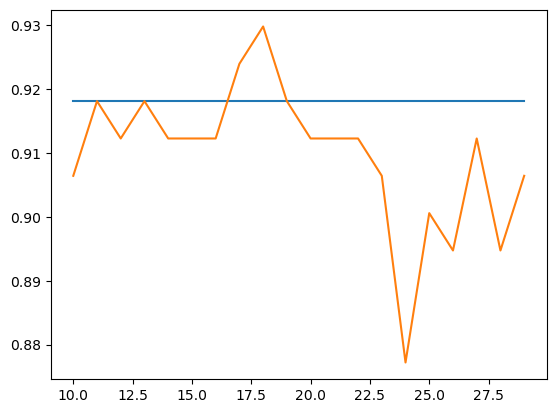

In [80]:
#Scrivi qui la soluzione          

def es3(X,y,n_features,selector):
    s = [SparseRandomProjection,GaussianRandomProjection,FeatureAgglomeration,PCA]                  
    sel = s[selector]
    select = sel(n_features)
    X_selected = select.fit_transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_selected, y, random_state=0, test_size=0.3)
    knn = KNeighborsClassifier(1,algorithm="brute")
    ab = DecisionTreeClassifier(max_depth=20,random_state=0)
    [c.fit(train_x,train_y) for c in [knn,ab]]
    accuracy = [compute_accuracy(test_y,c.predict(test_x)) for c in [knn,ab]]
    return accuracy
acc = []
rnf = list(range(10,30,1))
for nfi in rnf:
    acc= acc + [es3(X,y,nfi,3)]

plt.plot(rnf,acc)
plt.show()

# Trasformazione degli attributi

Durante le lezioni teoriche abbiamo visto che le trasformazioni degli attributi hanno lo scopo di facilitare la convergenza degli algoritmi di Machine Learning, molti dei quali assumono che i valori di tutti gli attributi siano centrate intorno allo zero o abbiano una varianza dello stesso ordine. 
Se un attributo ha una varianza di ordini di grandezza maggiore rispetto alle altre, potrebbe dominare la funzione obiettivo e rendere l’algoritmo di Machine Learning incapace di apprendere correttamente dalle altre caratteristiche. Durante questa esercitazione ci soffermeremo sulle tecniche di standardizzazione dei dati, in quanto sono un requisito comune a molti algoritmi di Machine Learning.

Il modulo di pre-processing dei dati di **Scikit-learn** mette a disposizione numerose classi per la standardizzazione dei dati. Tra queste ci sono la classe di utilità [StandardScaler(...)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), che rappresenta un modo semplice e veloce per trasformare i dati e centrarli, rimuovendo il valore medio di ogni caratteristica e scalandoli dividendo le caratteristiche non costanti per la loro deviazione standard.

In [81]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = StandardScaler()
scaler.fit(data)
#stampiamo i valori orginali
print("valori originali ")
print(data)
#stampiamo i valori trasformati
print("valori scalati ")
print(scaler.transform(data))

valori originali 
[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
valori scalati 
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


Dato che i valori riscalati non rientrano in un intervallo di valori predefinito, **Scikit-learn** mette a disposizione una trasformazione alternativa, il [MinMaxScaler(...)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) che scala i valori in un range predefinito (tipicamente [0,1]).

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
#stampiamo i valori orginali
print("valori originali ")
print(data)
#stampiamo i valori trasformati
print("valori scalati ")
print(scaler.transform(data))

valori originali 
[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
valori scalati 
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


A volte invece può essere utile riscalare i singoli record in modo che abbiano una norma unitaria. Questo processo può essere eseguito con la funzione [normalize(...)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) come mostrato di seguito.

In [83]:
from sklearn.preprocessing import normalize
#stampiamo i valori orginali
print("valori originali ")
print(data)
#stampiamo i valori trasformati
print("valori scalati ")
print(normalize(data, norm='l1'))

valori originali 
[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
valori scalati 
[[-0.33333333  0.66666667]
 [-0.07692308  0.92307692]
 [ 0.          1.        ]
 [ 0.05263158  0.94736842]]


## Esercizio 4

Utilizzando il dataset precedente, verificare come cambiano le prestazioni di un classificatore k-NN e di un albero decisionale utilizzando per il training di questi classificatori (dopo aver eseguito lo split dei dati) prima il training set originale e poi il training set con gli attributi trasformati con le tecniche di viste in precedenza.

In [87]:
#Scrivi qui la soluzione

def es3(X,y,n_features,selector):
    s = [MinMaxScaler,StandardScaler]                  
    sel = s[selector]
    select = sel()
    select.fit(X)
    X_selected = select.transform(X) 
    train_x, test_x, train_y, test_y = train_test_split(X_selected, y, random_state=0, test_size=0.3)
    knn = KNeighborsClassifier(1,algorithm="brute")
    ab = DecisionTreeClassifier(max_depth=20,random_state=0)
    [c.fit(train_x,train_y) for c in [knn,ab]]
    accuracy = [compute_accuracy(test_y,c.predict(test_x)) for c in [knn,ab]]
    return accuracy
es3(X,y,nfi,1)


[0.935672514619883, 0.9122807017543859]